Bu proje de hangi görsel hangi kategoriye aittir bunu sorgulayağız.

Öncelikle görselleri işleyeceğimiz ve modelleme yapacağımız kütüphaneleri yükleyelim.

In [4]:
import os
import json
import pandas as pd
import requests
from PIL import Image
from io import BytesIO

Şimdi meta veri setlerini yükleyelim. "images" sütunu içindeki large görselleri incelemek için meta veri setini yükleyip kontrol edeceğiz. proje de large görsellerden ilelememiz söylenmişti.

# Veri Hazırlık

In [5]:
# Meta Veri Setlerini Yükleme

In [6]:
base_path = r"C:\Users\Alper Ilgın\Desktop\bitime projesi\bitime projesi"
meta_all_beauty_file = os.path.join(base_path, "meta_All_Beauty.jsonl")
meta_digital_music_file = os.path.join(base_path, "meta_Digital_Music.jsonl")
meta_health_care_file = os.path.join(base_path, "meta_Health_and_Personal_Care.jsonl")

def load_meta_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = [json.loads(line) for line in f]
    return pd.DataFrame(data)

meta_all_beauty = load_meta_data(meta_all_beauty_file)
meta_digital_music = load_meta_data(meta_digital_music_file)
meta_health_care = load_meta_data(meta_health_care_file)

print("All Beauty Meta Veri Seti:")
print(meta_all_beauty.head())
print("\nDigital Music Meta Veri Seti:")
print(meta_digital_music.head())
print("\nHealth and Personal Care Meta Veri Seti:")
print(meta_health_care.head())

All Beauty Meta Veri Seti:
  main_category                                              title  \
0    All Beauty  Howard LC0008 Leather Conditioner, 8-Ounce (4-...   
1    All Beauty  Yes to Tomatoes Detoxifying Charcoal Cleanser ...   
2    All Beauty   Eye Patch Black Adult with Tie Band (6 Per Pack)   
3    All Beauty  Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...   
4    All Beauty  Precision Plunger Bars for Cartridge Grips – 9...   

   average_rating  rating_number  \
0             4.8             10   
1             4.5              3   
2             4.4             26   
3             3.1            102   
4             4.3              7   

                                            features  \
0                                                 []   
1                                                 []   
2                                                 []   
3                                                 []   
4  [Material: 304 Stainless Steel; Brass tip, Len...   

In [7]:
# Görselleri Kontrol Etme

Meta veri setindeki "images" sütununu kontrol edeceğiz. Görsellerin uygun şekilde indirilebilmesi için sütunun içeriğini inceleyeceğiz.

In [8]:
def check_images_column(meta_data, category_name):
    if 'images' in meta_data.columns:
        print(f"{category_name} veri setinde 'images' sütunu mevcut. İlk birkaç değeri kontrol edelim:")
        print(meta_data['images'].head())
    else:
        print(f"{category_name} veri setinde 'images' sütunu bulunamadı.")

check_images_column(meta_all_beauty, "All Beauty")
check_images_column(meta_digital_music, "Digital Music")
check_images_column(meta_health_care, "Health and Personal Care")

All Beauty veri setinde 'images' sütunu mevcut. İlk birkaç değeri kontrol edelim:
0    [{'thumb': 'https://m.media-amazon.com/images/...
1    [{'thumb': 'https://m.media-amazon.com/images/...
2    [{'thumb': 'https://m.media-amazon.com/images/...
3    [{'thumb': 'https://m.media-amazon.com/images/...
4    [{'thumb': 'https://m.media-amazon.com/images/...
Name: images, dtype: object
Digital Music veri setinde 'images' sütunu mevcut. İlk birkaç değeri kontrol edelim:
0    [{'thumb': 'https://m.media-amazon.com/images/...
1    [{'thumb': 'https://m.media-amazon.com/images/...
2    [{'thumb': 'https://m.media-amazon.com/images/...
3    [{'thumb': 'https://m.media-amazon.com/images/...
4    [{'thumb': 'https://m.media-amazon.com/images/...
Name: images, dtype: object
Health and Personal Care veri setinde 'images' sütunu mevcut. İlk birkaç değeri kontrol edelim:
0    [{'thumb': 'https://m.media-amazon.com/images/...
1    [{'thumb': 'https://m.media-amazon.com/images/...
2    [{'thumb': 'http

images" sütunu her üç veri setinde de mevcut görünüyor ve bu sütundaki veriler görsellerin URL'lerini içeriyor

In [9]:
def check_large_images(meta_data, category_name):
    missing_large = meta_data['images'].apply(lambda x: all('large' not in image for image in x))
    print(f"{category_name} veri setinde 'large' görsellerin eksik olduğu satır sayısı: {missing_large.sum()}")

check_large_images(meta_all_beauty, "All Beauty")
check_large_images(meta_digital_music, "Digital Music")
check_large_images(meta_health_care, "Health and Personal Care")

All Beauty veri setinde 'large' görsellerin eksik olduğu satır sayısı: 0
Digital Music veri setinde 'large' görsellerin eksik olduğu satır sayısı: 1
Health and Personal Care veri setinde 'large' görsellerin eksik olduğu satır sayısı: 0


eksik olan veriyi direk olarak çıkartıyorum. sayısı az ve benim datam çok fazla. bunun için filtreleme işlemi yapıyorum.

In [10]:
missing_large_row = meta_digital_music[~meta_digital_music['images'].apply(lambda x: any('large' in img for img in x))]
print("Eksik large görseli olan satır:")
print(missing_large_row)

meta_digital_music = meta_digital_music[meta_digital_music['images'].apply(lambda x: any('large' in img for img in x))]

print("Temizlenmiş Digital Music veri seti boyutu:", len(meta_digital_music))

Eksik large görseli olan satır:
       main_category                                              title  \
57747  Digital Music  Jesus Siempre Llega a Tiempo by Hernandez, Sam...   

       average_rating  rating_number features description  price images  \
57747             4.8             65       []          []    NaN     []   

      videos                                store categories  \
57747     []  Samuel Hernandez   Format: Audio CD         []   

                                            details parent_asin  \
57747  {'Date First Available': 'December 6, 2017'}  B00G2I82FO   

      bought_together  
57747            None  
Temizlenmiş Digital Music veri seti boyutu: 70536


In [11]:
total_images = (
    meta_all_beauty["images"].notnull().sum() +
    (meta_digital_music["images"].notnull().sum() - 1) +
    meta_health_care["images"].notnull().sum()
)
print(f"İndirilecek toplam görsel sayısı: {total_images}")

İndirilecek toplam görsel sayısı: 243418


yukarıda çok fazla bir görsel var. bunun hepsini indirmem benim işletim sistemime fazla geliyor :) o yüzden sınırlandırıcağım.

In [ ]:
her kategoriden 15000 örnek seçerek işlem yapıyorum. daha yüksel verilerde sorun yaşıyorum. kitleniyor personel computerim

In [14]:
import os
import requests
from PIL import Image
from io import BytesIO

base_download_path = "C:/Users/Alper Ilgın/Desktop/bitime projesi/bitime projesi"
download_dirs = {
    "All_Beauty": os.path.join(base_download_path, "All_Beauty_Images"),
    "Digital_Music": os.path.join(base_download_path, "Digital_Music_Images"),
    "Health_Care": os.path.join(base_download_path, "Health_Care_Images"),
}

num_samples_per_category = 15000
sampled_all_beauty = meta_all_beauty.sample(n=num_samples_per_category, random_state=42)
sampled_digital_music = meta_digital_music.sample(n=num_samples_per_category, random_state=42)
sampled_health_care = meta_health_care.sample(n=num_samples_per_category, random_state=42)

def download_images(data, category, download_dir):
    os.makedirs(download_dir, exist_ok=True)  # İndirme klasörünü oluştur
    count = 0

    for _, row in data.iterrows():
        try:
            large_image_url = row["images"][0]["large"]
            response = requests.get(large_image_url, stream=True)
            response.raise_for_status()
            
            img = Image.open(BytesIO(response.content))
            output_path = os.path.join(download_dir, f"{category}_{count}.jpg")
            img.save(output_path, "JPEG")
            count += 1

            if count % 100 == 0:
                print(f"{count} adet görsel indirildi: {category}")
            
            if count >= num_samples_per_category:
                break
        except Exception as e:
            print(f"Görsel indirilemedi: {row['title']} -> {e}")

    print(f"{category} kategorisi için toplam {count} görsel indirildi.")

download_images(sampled_all_beauty, "All_Beauty", download_dirs["All_Beauty"])
download_images(sampled_digital_music, "Digital_Music", download_dirs["Digital_Music"])
download_images(sampled_health_care, "Health_Care", download_dirs["Health_Care"])

100 adet görsel indirildi: All_Beauty
Görsel indirilemedi: Sparkle & Co. pH Prep, Base Bond, Solidify & Glossy Coat -> 404 Client Error: Not Found for url: https://m.media-amazon.com/images/I/41a2mLrUvGL.jpg
200 adet görsel indirildi: All_Beauty
300 adet görsel indirildi: All_Beauty
Görsel indirilemedi: GOTONE 18pcs Siwa Hair Bows for Girls, 5 Inches Alligator Clips Unicorn Grosgrain Ribbon Hair Barrettes Accessories for Toddler Teens Kids -> cannot write mode P as JPEG
400 adet görsel indirildi: All_Beauty
Görsel indirilemedi: Avon Mark Lock It up Wallet Purple -> cannot write mode P as JPEG
500 adet görsel indirildi: All_Beauty
Görsel indirilemedi: Clip in Synthetic Hair Bun Comb Messy Brown Mix -> cannot write mode P as JPEG
Görsel indirilemedi: Platinum Blonde #60 -> cannot write mode P as JPEG
600 adet görsel indirildi: All_Beauty
Görsel indirilemedi: CHOPMALL(TM) Fashion Lady Retro Infinity Black Elephant Anchor Love Lover Strands Suede Rope Bracelet Gift -> cannot write mode P a

In [15]:
# ön işleme

Görselleri normalize edeceğiz ve model eğitimi için uygun boyutlara (224x224) getireceğiz. ayrı bir normalize edilmiş klasöre kaydediceğim. Görsellerin piksel değerleri normalize edilerek 0-1 aralığına düşüreceğim. 

0-1 aralığında modelin daha kararlı, hızlı ve verimli bir şekilde öğrenmesi sağlanıyor.

In [16]:
import os
from PIL import Image
import numpy as np

def normalize_and_resize_images(input_dir, output_dir, target_size=(224, 224)):
    os.makedirs(output_dir, exist_ok=True)  # Çıkış klasörünü oluştur
    count = 0

    for file_name in os.listdir(input_dir):
        try:
            input_path = os.path.join(input_dir, file_name)
            img = Image.open(input_path)

            img = img.resize(target_size)
            img_array = np.array(img) / 255.0

            img = Image.fromarray((img_array * 255).astype(np.uint8))
            output_path = os.path.join(output_dir, file_name)
            img.save(output_path, "JPEG")
            count += 1

            if count % 500 == 0:
                print(f"{count} görsel işlendi: {input_dir}")
        except Exception as e:
            print(f"Görsel işlenirken hata oluştu: {file_name} -> {e}")

    print(f"{input_dir} klasöründen toplam {count} görsel işlendi ve kaydedildi.")

base_output_path = "C:/Users/Alper Ilgın/Desktop/bitime projesi/bitime projesi"
output_dirs = {
    "All_Beauty": os.path.join(base_output_path, "Normalized_All_Beauty_Images"),
    "Digital_Music": os.path.join(base_output_path, "Normalized_Digital_Music_Images"),
    "Health_Care": os.path.join(base_output_path, "Normalized_Health_Care_Images"),
}

normalize_and_resize_images(download_dirs["All_Beauty"], output_dirs["All_Beauty"])
normalize_and_resize_images(download_dirs["Digital_Music"], output_dirs["Digital_Music"])
normalize_and_resize_images(download_dirs["Health_Care"], output_dirs["Health_Care"])

500 görsel işlendi: C:/Users/Alper Ilgın/Desktop/bitime projesi/bitime projesi\All_Beauty_Images
1000 görsel işlendi: C:/Users/Alper Ilgın/Desktop/bitime projesi/bitime projesi\All_Beauty_Images
1500 görsel işlendi: C:/Users/Alper Ilgın/Desktop/bitime projesi/bitime projesi\All_Beauty_Images
2000 görsel işlendi: C:/Users/Alper Ilgın/Desktop/bitime projesi/bitime projesi\All_Beauty_Images
2500 görsel işlendi: C:/Users/Alper Ilgın/Desktop/bitime projesi/bitime projesi\All_Beauty_Images
3000 görsel işlendi: C:/Users/Alper Ilgın/Desktop/bitime projesi/bitime projesi\All_Beauty_Images
3500 görsel işlendi: C:/Users/Alper Ilgın/Desktop/bitime projesi/bitime projesi\All_Beauty_Images
4000 görsel işlendi: C:/Users/Alper Ilgın/Desktop/bitime projesi/bitime projesi\All_Beauty_Images
4500 görsel işlendi: C:/Users/Alper Ilgın/Desktop/bitime projesi/bitime projesi\All_Beauty_Images
5000 görsel işlendi: C:/Users/Alper Ilgın/Desktop/bitime projesi/bitime projesi\All_Beauty_Images
5500 görsel işlendi: 

In [17]:
from PIL import Image
import os

def check_sample_images(directory, num_samples=5):
    print(f"{directory} klasöründeki ilk {num_samples} görselin boyut ve format bilgisi kontrol ediliyor...")
    files = os.listdir(directory)[:num_samples]
    for file in files:
        file_path = os.path.join(directory, file)
        try:
            img = Image.open(file_path)
            print(f"{file}: Boyut -> {img.size}, Format -> {img.format}")
        except Exception as e:
            print(f"Görsel açılırken hata oluştu: {file} -> {e}")

check_sample_images(output_dirs["All_Beauty"])
check_sample_images(output_dirs["Digital_Music"])
check_sample_images(output_dirs["Health_Care"])

C:/Users/Alper Ilgın/Desktop/bitime projesi/bitime projesi\Normalized_All_Beauty_Images klasöründeki ilk 5 görselin boyut ve format bilgisi kontrol ediliyor...
All_Beauty_0.jpg: Boyut -> (224, 224), Format -> JPEG
All_Beauty_1.jpg: Boyut -> (224, 224), Format -> JPEG
All_Beauty_10.jpg: Boyut -> (224, 224), Format -> JPEG
All_Beauty_100.jpg: Boyut -> (224, 224), Format -> JPEG
All_Beauty_1000.jpg: Boyut -> (224, 224), Format -> JPEG
C:/Users/Alper Ilgın/Desktop/bitime projesi/bitime projesi\Normalized_Digital_Music_Images klasöründeki ilk 5 görselin boyut ve format bilgisi kontrol ediliyor...
Digital_Music_0.jpg: Boyut -> (224, 224), Format -> JPEG
Digital_Music_1.jpg: Boyut -> (224, 224), Format -> JPEG
Digital_Music_10.jpg: Boyut -> (224, 224), Format -> JPEG
Digital_Music_100.jpg: Boyut -> (224, 224), Format -> JPEG
Digital_Music_1000.jpg: Boyut -> (224, 224), Format -> JPEG
C:/Users/Alper Ilgın/Desktop/bitime projesi/bitime projesi\Normalized_Health_Care_Images klasöründeki ilk 5 gö

In [18]:
# modelleme

önce normalize edilmiş görsellerden bir eğitim ve test veri seti oluşturacağız. Temelden bir ConvNet modeli oluşturacağız. Modelimizi eğitim verileriyle eğiteceğiz. Test verileriyle doğruluk oranını, karışıklık matrisini ve kategori bazlı performans metriklerini hesaplayacağız

In [19]:
from sklearn.model_selection import train_test_split
import os

normalized_dirs = {
    "All_Beauty": "C:/Users/Alper Ilgın/Desktop/bitime projesi/bitime projesi/Normalized_All_Beauty_Images",
    "Digital_Music": "C:/Users/Alper Ilgın/Desktop/bitime projesi/bitime projesi/Normalized_Digital_Music_Images",
    "Health_Care": "C:/Users/Alper Ilgın/Desktop/bitime projesi/bitime projesi/Normalized_Health_Care_Images",
}

all_images = []
labels = []

for label, directory in normalized_dirs.items():
    for file_name in os.listdir(directory):
        file_path = os.path.join(directory, file_name)
        all_images.append(file_path)
        labels.append(label)

train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, labels, test_size=0.2, random_state=42
)

print(f"Eğitim veri sayısı: {len(train_images)}")
print(f"Test veri sayısı: {len(test_images)}")

Eğitim veri sayısı: 35388
Test veri sayısı: 8847


normalized_dirs: Normalize edilmiş görsellerin bulunduğu klasörlerin yolları.
train_test_split: Görselleri %80 eğitim ve %20 test olacak şekilde böler.

Convolutional Neural Network (CNN) modeli oluşturup eğiteceğiz

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

input_shape = (224, 224, 3)  
num_classes = len(normalized_dirs)

cnn_model = create_cnn_model(input_shape, num_classes)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()

datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)

train_data = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_images, 'class': train_labels}),
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_images, 'class': train_labels}),
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

history = cnn_model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

C:\Users\Alper Ilgın\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Found 28311 validated image filenames belonging to 3 classes.
Found 7077 validated image filenames belonging to 3 classes.


C:\Users\Alper Ilgın\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 1189s 1s/step - accuracy: 0.5621 - loss: 0.9553 - val_accuracy: 0.6969 - val_loss: 0.7838
Epoch 2/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 1009s 1s/step - accuracy: 0.7185 - loss: 0.6827 - val_accuracy: 0.7636 - val_loss: 0.5920
Epoch 3/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 1007s 1s/step - accuracy: 0.7683 - loss: 0.5727 - val_accuracy: 0.7783 - val_loss: 0.5569
Epoch 4/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 1013s 1s/step - accuracy: 0.8042 - loss: 0.5028 - val_accuracy: 0.7835 - val_loss: 0.5538
Epoch 5/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 1009s 1s/step - accuracy: 0.8255 - loss: 0.4263 - val_accuracy: 0.7830 - val_loss: 0.5772
Epoch 6/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 1008s 1s/step - accuracy: 0.8517 - loss: 0.3753 - val_accuracy: 0.7900 - val_loss: 0.5895
Epoch 7/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 1009s 1s/step - accuracy: 0.8754 - loss: 0.3119 - val_accuracy: 0.7909 - val_loss: 0.6389
Epoch 8/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 1019s 1s/step - accuracy: 0.8896 - loss: 0.2702 - 

In [22]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print(f"Son Epoch Eğitim Doğruluk Oranı: {train_accuracy[-1]:.4f}")
print(f"Son Epoch Test Doğruluk Oranı: {val_accuracy[-1]:.4f}")

Son Epoch Eğitim Doğruluk Oranı: 0.9113
Son Epoch Test Doğruluk Oranı: 0.7839


Eğitim verisi ile model zaten öğrenmiş olduğu örnekler üzerinden değerlendirilir, bu nedenle genellikle yüksek doğruluk oranları elde edilir.

Ancak, asıl amaç modelin genelleme kapasitesini ölçmektir. Bu nedenle modelin daha önce hiç görmediği test verisi kullanılarak performans değerlendirilir.

222/222 ━━━━━━━━━━━━━━━━━━━━ 62s 277ms/step


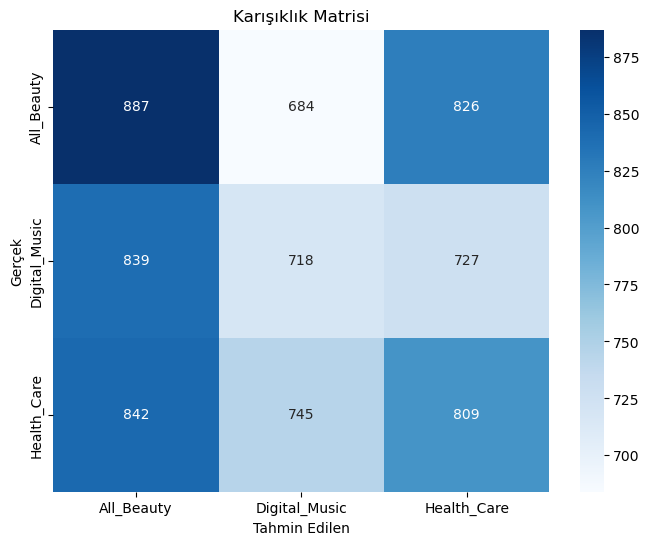

In [27]:
test_steps = len(val_data) 
y_pred = cnn_model.predict(val_data, steps=test_steps, verbose=1) 
y_pred_classes = np.argmax(y_pred, axis=1
y_true = val_data.classes

class_labels = list(val_data.class_indices.keys())

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

Diyagonal hücrelerin değerleri ne kadar yüksekse, modelin doğruluk oranı o kadar iyidir. Yanlış tahminlerin olduğu hücreler ise modelin hangi sınıflar arasında zorlandığını gösterir.

Bu değerler, modelin hangi sınıflarda daha başarılı olduğunu gösterir. Örneğin, All_Beauty sınıfında model en iyi performansı göstermiş.

Yanlış tahminler, sınıflar arasındaki benzerliklerden veya veri dengesizliklerinden kaynaklanıyor olabilir.

In [29]:
# Kategori bazlı performans metriklerini hesaplayım şidmi

In [30]:
from sklearn.metrics import classification_report

y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_data.classes 

class_labels = list(val_data.class_indices.keys())

report = classification_report(y_true, y_pred_classes, target_names=class_labels)

print("Kategori Bazlı Performans Metrikleri:")
print(report)


Kategori Bazlı Performans Metrikleri:
               precision    recall  f1-score   support

   All_Beauty       0.35      0.37      0.36      2397
Digital_Music       0.33      0.31      0.32      2284
  Health_Care       0.34      0.34      0.34      2396

     accuracy                           0.34      7077
    macro avg       0.34      0.34      0.34      7077
 weighted avg       0.34      0.34      0.34      7077



All_Beauty (0.35):

Modelin "All_Beauty" olarak tahmin ettiği örneklerin %35'i doğru.
Bu oran düşük ve modelin "All_Beauty" tahminlerinde dikkatli olmadığına işaret ediyor.
Digital_Music (0.33):

Modelin "Digital_Music" olarak tahmin ettiği örneklerin %33'ü doğru.
Bu sınıfta da düşük bir kesinlik var.
Health_Care (0.34):

Modelin "Health_Care" tahminlerinde de yalnızca %34'lük bir kesinlik mevcut.

Recall (Duyarlılık):
All_Beauty (0.37):

Gerçek "All_Beauty" örneklerinin %37'si doğru tahmin edilmiş.
Model bu sınıfta bazı örnekleri doğru tahmin ederken çoğunu kaçırmış gibi görünüyor.
Digital_Music (0.31):

Gerçek "Digital_Music" örneklerinin %31'i doğru tahmin edilmiş.
Bu sınıfta duyarlılık diğer sınıflara göre daha düşük.
Health_Care (0.34):

Gerçek "Health_Care" örneklerinin %34'ü doğru tahmin edilmiş.
Bu sınıfta da duyarlılık düşük.

Support, her sınıfta kaç örnek olduğunu gösterir

 bu metrikler, modelin mevcut haliyle sınıfları ayırt etmekte zorlandığını ve performansı artırmak için modelleme, veri işleme veya veri artırma adımlarında iyileştirmeler yapılması gerektiğini gösteriyor.